In [1]:

from matplotlib import pyplot as plt
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.annotations import Title
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral10
import seaborn as sns
from datetime import date
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json




In [2]:
df = pd.read_csv("eurofxref-hist.csv")

print(df.head())
print(df.shape)
print(df.columns)

         Date     USD     JPY     BGN  CYP     CZK     DKK  EEK      GBP  \
0  29-11-2022  1.0366  143.36  1.9558  NaN  24.334  7.4367  NaN  0.86218   
1  28-11-2022  1.0463  144.90  1.9558  NaN  24.348  7.4367  NaN  0.86606   
2  25-11-2022  1.0375  144.62  1.9558  NaN  24.367  7.4365  NaN  0.85885   
3  24-11-2022  1.0413  143.90  1.9558  NaN  24.392  7.4369  NaN  0.85933   
4  23-11-2022  1.0325  145.75  1.9558  NaN  24.356  7.4370  NaN  0.86369   

      HUF  ...     ILS      INR      KRW      MXN     MYR     NZD     PHP  \
0  406.50  ...  3.5581  84.6548  1375.70  19.8075  4.6735  1.6639  58.640   
1  408.87  ...  3.6002  85.4370  1396.56  20.2200  4.6874  1.6827  59.210   
2  411.33  ...  3.5551  84.7145  1383.20  20.1069  4.6480  1.6651  58.795   
3  413.33  ...  3.5607  85.0295  1382.28  20.1501  4.6806  1.6598  58.992   
4  405.75  ...  3.5681  84.4660  1397.42  20.0010  4.7237  1.6718  58.914   

      SGD     THB      ZAR  
0  1.4237  36.706  17.6027  
1  1.4375  37.285  17.

## A. Data Analysis 

In [3]:
df = df.drop(['CYP','EEK','LTL','LVL','MTL','ROL','SIT','SKK','RUB','TRL', 'BRL'], axis=1)

In [4]:
df.fillna(method="ffill", inplace=True)

In [5]:
#df.columns = map(str.upper, df.columns)
df.rename(columns=lambda x:x+'_EUR', inplace=True)
df.rename(columns={'Date_EUR':'Time Series'}, inplace=True)

In [6]:
df.head(15)

,Time Series,USD_EUR,JPY_EUR,BGN_EUR,CZK_EUR,DKK_EUR,GBP_EUR,HUF_EUR,PLN_EUR,RON_EUR,...,ILS_EUR,INR_EUR,KRW_EUR,MXN_EUR,MYR_EUR,NZD_EUR,PHP_EUR,SGD_EUR,THB_EUR,ZAR_EUR
0,29-11-2022,1.0366,143.36,1.9558,24.334,7.4367,0.86218,406.50,4.6730,4.9193,...,3.5581,84.6548,1375.70,19.8075,4.6735,1.6639,58.640,1.4237,36.706,17.6027
1,28-11-2022,1.0463,144.90,1.9558,24.348,7.4367,0.86606,408.87,4.6938,4.9246,...,3.6002,85.4370,1396.56,20.2200,4.6874,1.6827,59.210,1.4375,37.285,17.9376
2,25-11-2022,1.0375,144.62,1.9558,24.367,7.4365,0.85885,411.33,4.6875,4.9255,...,3.5551,84.7145,1383.20,20.1069,4.6480,1.6651,58.795,1.4277,37.153,17.7677
3,24-11-2022,1.0413,143.90,1.9558,24.392,7.4369,0.85933,413.33,4.6958,4.9205,...,3.5607,85.0295,1382.28,20.1501,4.6806,1.6598,58.992,1.4319,37.258,17.7246
4,23-11-2022,1.0325,145.75,1.9558,24.356,7.4370,0.86369,405.75,4.7033,4.9370,...,3.5681,84.4660,1397.42,20.0010,4.7237,1.6718,58.914,1.4295,37.423,17.7103
5,22-11-2022,1.0274,145.20,1.9558,24.351,7.4377,0.86358,408.23,4.7125,4.9269,...,3.5615,83.8768,1392.68,20.0951,4.7055,1.6707,58.942,1.4167,37.110,17.7568
6,21-11-2022,1.0246,145.33,1.9558,24.356,7.4377,0.86793,409.43,4.7075,4.9413,...,3.5515,83.7375,1395.00,19.9357,4.6927,1.6766,58.822,1.4162,37.121,17.7858
7,18-11-2022,1.0366,145.12,1.9558,24.351,7.4385,0.87063,407.41,4.7033,4.9413,...,3.5910,84.6875,1389.02,20.1620,4.7202,1.6757,59.410,1.4229,37.069,17.9080
8,17-11-2022,1.0319,144.80,1.9558,24.399,7.4383,0.87475,415.60,4.7153,4.9254,...,3.5796,84.3940,1394.06,20.0620,4.7122,1.6986,59.293,1.4221,37.123,18.0961
9,16-11-2022,1.0412,145.29,1.9558,24.355,7.4386,0.87483,408.18,4.7065,4.9206,...,3.5684,84.5905,1378.10,20.1227,4.7323,1.6897,59.678,1.4250,37.103,18.0195


## B. Data Visualisation


In [7]:
# make sure that the values are numeric instead of objects
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df['Time Series'] = pd.to_datetime(df['Time Series'],infer_datetime_format=True)
df['month'] = df['Time Series'].dt.month
df['year'] = df['Time Series'].dt.year
df['month_year'] = df['Time Series'].dt.to_period('M')


In [11]:
df.corr()

,USD_EUR,JPY_EUR,BGN_EUR,CZK_EUR,DKK_EUR,GBP_EUR,HUF_EUR,PLN_EUR,RON_EUR,SEK_EUR,...,KRW_EUR,MXN_EUR,MYR_EUR,NZD_EUR,PHP_EUR,SGD_EUR,THB_EUR,ZAR_EUR,month,year
USD_EUR,1.000000,0.504088,0.584733,-0.565916,0.200784,0.437455,-0.111536,-0.127737,0.023357,0.013742,...,0.737523,-0.090170,-0.278160,-0.096658,-0.158603,0.575172,-0.048587,0.041625,-0.003649,0.155478
JPY_EUR,0.504088,1.000000,0.359660,-0.238461,0.113772,0.008916,-0.029341,-0.134218,-0.169871,0.191146,...,0.163795,-0.042658,0.194729,-0.024735,0.022896,0.532385,0.053856,0.139033,-0.022036,0.109331
BGN_EUR,0.584733,0.359660,1.000000,-0.818267,0.322886,0.655902,0.443620,0.120170,0.516496,0.391477,...,0.436356,0.390972,-0.420414,-0.508622,-0.644378,-0.016821,-0.603957,0.550143,-0.016168,0.678787
CZK_EUR,-0.565916,-0.238461,-0.818267,1.000000,-0.238069,-0.812667,-0.545636,-0.127864,-0.666724,-0.478086,...,-0.529953,-0.478439,0.463874,0.505427,0.708466,0.180186,0.715239,-0.669465,-0.044900,-0.792236
DKK_EUR,0.200784,0.113772,0.322886,-0.238069,1.000000,0.134086,0.073495,-0.279107,0.109821,0.064112,...,0.003713,0.009586,-0.268836,-0.097242,-0.255804,-0.072269,-0.223679,0.136539,-0.048812,0.182456
GBP_EUR,0.437455,0.008916,0.655902,-0.812667,0.134086,1.000000,0.677524,0.410744,0.827490,0.605076,...,0.602681,0.699273,-0.297075,-0.440811,-0.631796,-0.307579,-0.744096,0.743117,0.019604,0.824393
HUF_EUR,-0.111536,-0.029341,0.443620,-0.545636,0.073495,0.677524,1.000000,0.648693,0.909739,0.619224,...,0.076721,0.827336,-0.187407,-0.566211,-0.688784,-0.675616,-0.836912,0.873587,0.032329,0.901964
PLN_EUR,-0.127737,-0.134218,0.120170,-0.127864,-0.279107,0.410744,0.648693,1.000000,0.584125,0.382318,...,0.154946,0.555964,-0.020114,-0.370419,-0.307653,-0.304057,-0.431749,0.474416,0.023331,0.496656
RON_EUR,0.023357,-0.169871,0.516496,-0.666724,0.109821,0.827490,0.909739,0.584125,1.000000,0.564802,...,0.239737,0.823276,-0.320112,-0.638854,-0.762515,-0.696948,-0.882859,0.875062,0.019724,0.932026
SEK_EUR,0.013742,0.191146,0.391477,-0.478086,0.064112,0.605076,0.619224,0.382318,0.564802,1.000000,...,0.297178,0.720255,0.219975,-0.011474,-0.262314,-0.184490,-0.501407,0.672932,0.027599,0.627964


<AxesSubplot:>

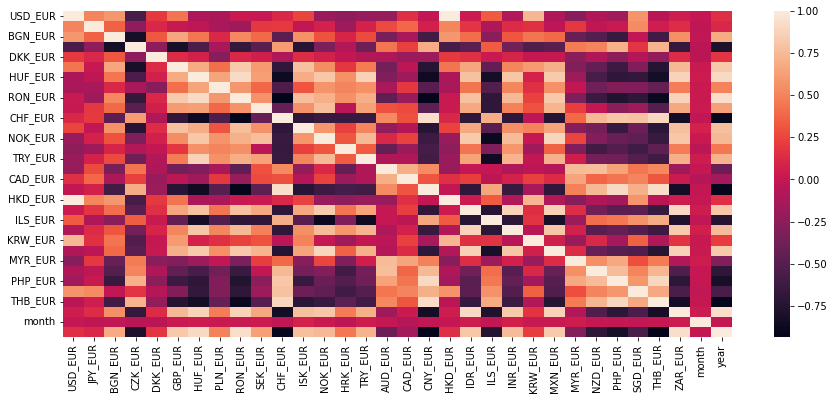

In [12]:
sns.heatmap(df.corr())

In [13]:
df_groupby_usd = df.groupby('month_year').USD_EUR.mean().reset_index()
print(df_groupby_usd)

    month_year   USD_EUR
0      1999-01  1.160780
1      1999-02  1.120765
2      1999-03  1.088296
3      1999-04  1.070441
4      1999-05  1.062810
..         ...       ...
282    2022-07  1.017890
283    2022-08  1.012843
284    2022-09  0.990377
285    2022-10  0.982567
286    2022-11  1.019295

[287 rows x 2 columns]


In [14]:
groupby_all = df.groupby('month_year').apply(lambda x: pd.Series({
                                                    'USD_mean': x['USD_EUR'].mean(),
                                                    'GBP_mean': x['GBP_EUR'].mean(),
                                                    'CHF_mean': x['CHF_EUR'].mean(),
                                                    'DKK_mean': x['DKK_EUR'].mean(),
                                                    'CNY_mean': x['CNY_EUR'].mean(),
                                                    'AUD_mean': x['AUD_EUR'].mean()
                                                    
})).reset_index()

groupby_all = pd.DataFrame(groupby_all)

groupby_all['EUR_mean'] = [1 for i in range(287)]
groupby_all.head()


,month_year,USD_mean,GBP_mean,CHF_mean,DKK_mean,CNY_mean,AUD_mean,EUR_mean
0,1999-01,1.160780,0.702912,1.605495,7.441170,10.7255,1.838730,1
1,1999-02,1.120765,0.688505,1.597850,7.435195,10.7255,1.751460,1
2,1999-03,1.088296,0.671270,1.595430,7.432474,10.7255,1.726004,1
3,1999-04,1.070441,0.665018,1.601532,7.432695,10.7255,1.668364,1
4,1999-05,1.062810,0.658252,1.602505,7.433286,10.7255,1.604586,1


In [15]:
groupby_all.shape

(287, 8)

In [16]:
## Illustrating the difference of main exchange rates against the baseline visually

In [18]:

groupby_all['month_year'] = groupby_all['month_year'].astype(str)
groupby_all['month_year'] = pd.to_datetime(groupby_all['month_year'])

source = ColumnDataSource(groupby_all)

output_notebook()

p = figure(plot_height = 600, \
           plot_width = 900, \
           x_axis_type = 'datetime')

p.line(x='month_year', y='USD_mean', legend_label = 'USD_mean', source=source, color=Spectral10[1], line_width=4)
p.line(x='month_year', y='GBP_mean', legend_label = 'GBP_mean', source=source, color=Spectral10[2], line_width=4)
p.line(x='month_year', y='CHF_mean', legend_label = 'CHF_mean', source=source, color=Spectral10[3], line_width=4)
p.line(x='month_year', y='DKK_mean', legend_label = 'DKK_mean', source=source, color=Spectral10[4], line_width=4)
p.line(x='month_year', y='CNY_mean', legend_label = 'CNY_mean', source=source, color=Spectral10[5], line_width=4)
p.line(x='month_year', y='AUD_mean', legend_label = 'AUD_mean', source=source, color=Spectral10[6], line_width=4)
p.line(x='month_year', y='EUR_mean', legend_label = 'EUR_mean', source=source, color=Spectral10[7], line_width=4)

p.xaxis[0].ticker.desired_num_ticks = 15

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Exchange Rate'

t = Title()
t.text = 'Exchange Rate: Top Countries/EUR'
p.title = t

hover = HoverTool(tooltips = [
                  ('USD_mean','@USD_mean'),\
                  ('GBP_mean', '@GBP_mean'),\
                  ('CHF_mean', '@CHF_mean'),\
                  ('DKK_mean', '@DKK_mean'),\
                  ('CNY_mean', '@CNY_mean'),\
                  ('AUD_mean', '@AUD_mean'),\
                  ('EUR_mean', '@EUR_mean')])
p.add_tools(hover)
show(p)

Loading BokehJS ...